# Step #1 Data Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

In [2]:
file_path = 'Data/LI-Small_Trans.csv'
df = pd.read_csv(file_path)

In [3]:
# Convert 'Timestamp' to datetime and extract features like year, month, day, hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(columns=['Timestamp'])

## Convert categorical variables to numerical using LabelEncoder

In [4]:
label_encoder = LabelEncoder()

df['Receiving Currency'] = label_encoder.fit_transform(df['Receiving Currency'])
df['Payment Currency'] = label_encoder.fit_transform(df['Payment Currency'])
df['Payment Format'] = label_encoder.fit_transform(df['Payment Format'])

In [5]:
# Features and Target
X = df.drop(columns=['Is Laundering', 'Account', 'Account.1'])
y = df['Is Laundering']

In [6]:
# Convert the class labels to numpy array
import numpy as np
from sklearn.utils import class_weight

classes = np.array([0, 1])

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y)
class_weight_dict = {classes[i]: class_weights[i] for i in range(len(classes))}

# Print class weights to verify
print(class_weight_dict)

{0: 0.5002575686902824, 1: 971.1148667601683}


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9995


In [10]:
y_pred = model.predict(X_test)

In [11]:
import joblib

# Save the trained model to a file
model_filename = 'xgb_SmallData.joblib'
joblib.dump(model, model_filename)

print(f'Model saved to {model_filename}')

Model saved to xgb_SmallData.joblib


In [12]:
# Load the model from the file
loaded_model = joblib.load(model_filename)

# Check if the loaded model works
y_pred_loaded = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred_loaded))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1384099
           1       0.96      0.04      0.07       711

    accuracy                           1.00   1384810
   macro avg       0.98      0.52      0.54   1384810
weighted avg       1.00      1.00      1.00   1384810



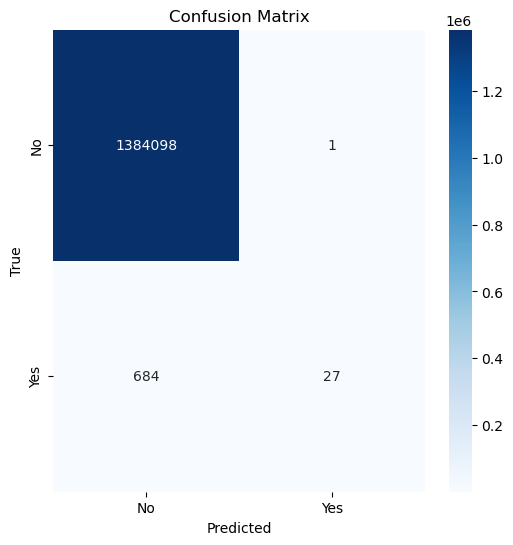

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


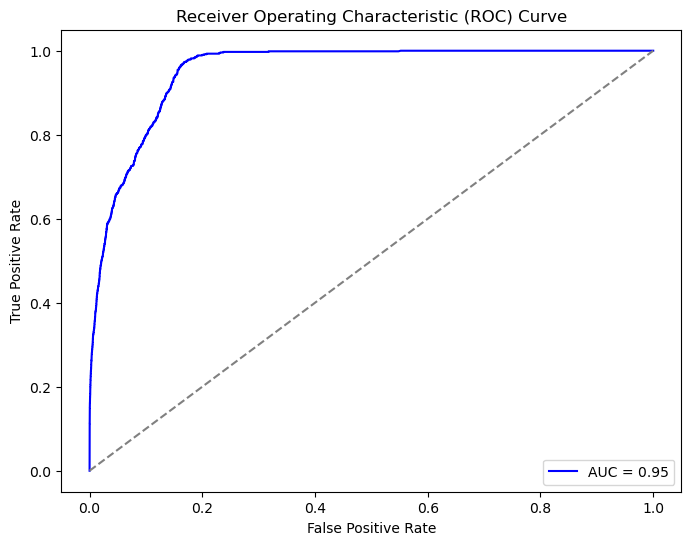

In [14]:
from sklearn.metrics import roc_curve, auc

# Get False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


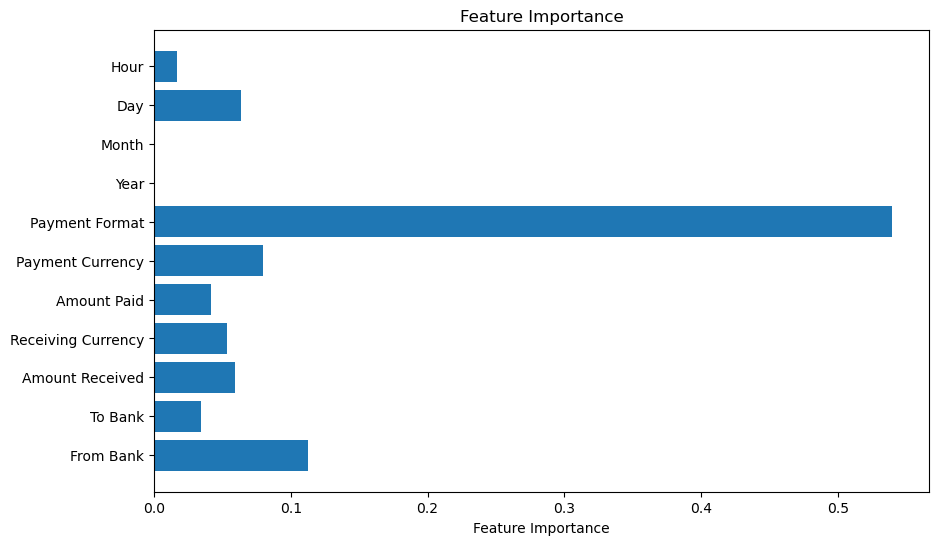

In [15]:
import matplotlib.pyplot as plt

# Assuming `model` is your trained model
# For XGBoost or LightGBM, you can directly access feature importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), X_train.columns)  # Use your feature names
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


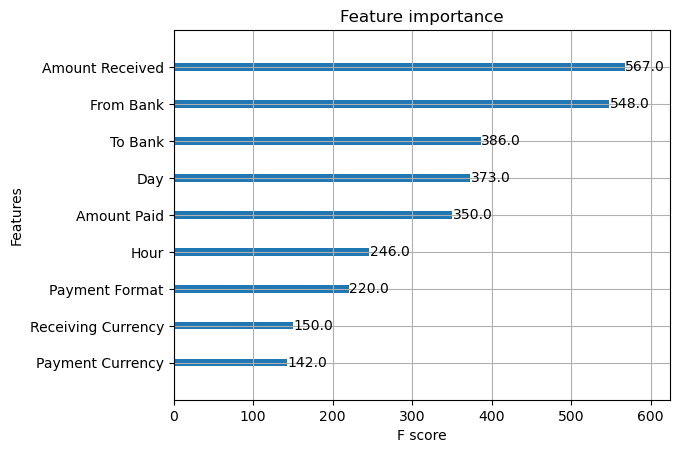

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming model is your XGBoost model
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()


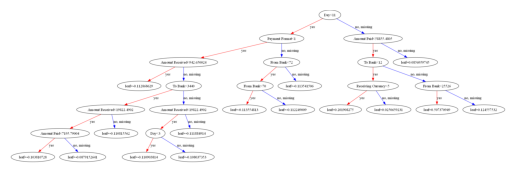

In [23]:
import xgboost as xgb

# Plot the first tree
xgb.plot_tree(model, num_trees=0)
plt.show()

In [24]:
import xgboost as xgb
from graphviz import Digraph

# Export the model to a dot file
xgb.to_graphviz(model, num_trees=0).render("tree_graph", format="png")

# You can open the generated file (tree_graph.png) for visualization


'tree_graph.png'

In [3]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


KeyboardInterrupt

